In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import warnings

# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

# Load the data
data = pd.read_csv('/content/encoded_resampled_dataset.csv')  # Path to your encoded dataset

# Separate Features and Target variables
X = data.drop(columns=['clarity', 'color', 'cut'])  # Excluding target columns
y = data[['clarity', 'color', 'cut']]  # Multi-label targets

# Convert Multi-Label Targets to Multi-Class (one-hot -> label)
y_multiclass = y.apply(lambda x: x.idxmax(), axis=1)

# Split the data into Training, Validation, and Test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_multiclass, test_size=0.3, stratify=y_multiclass, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Feature Scaling (Standardize features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Dimensionality Reduction using PCA (Reduce to components needed for 95% variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Hyperparameter Tuning using GridSearchCV for SVM (Smaller grid to speed up)
param_grid = {
    'C': [1, 10],  # Simplified range for faster search
    'kernel': ['rbf'],  # Only RBF for simplicity
    'gamma': ['scale'],
    'class_weight': [None, 'balanced']
}

svm = SVC(random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=0)  # Parallelize GridSearchCV
grid_search.fit(X_train_pca, y_train)

# Best Parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Best Model
best_svm = grid_search.best_estimator_

# Train on the best model
best_svm.fit(X_train_pca, y_train)

# Evaluate the Model
y_train_pred = best_svm.predict(X_train_pca)
y_val_pred = best_svm.predict(X_val_pca)
y_test_pred = best_svm.predict(X_test_pca)

# Accuracy Scores
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# F1-Score
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Precision and Recall
train_precision = precision_score(y_train, y_train_pred, average='weighted')
val_precision = precision_score(y_val, y_val_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')

train_recall = recall_score(y_train, y_train_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')

# Print the Results
print(f"\nTuned SVM Results")
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Validation Accuracy: {val_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Train F1-Score: {train_f1:.2f}")
print(f"Validation F1-Score: {val_f1:.2f}")
print(f"Test F1-Score: {test_f1:.2f}")
print(f"Train Precision: {train_precision:.2f}")
print(f"Validation Precision: {val_precision:.2f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Train Recall: {train_recall:.2f}")
print(f"Validation Recall: {val_recall:.2f}")
print(f"Test Recall: {test_recall:.2f}")


Best Parameters: {'C': 1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}

Tuned SVM Results
Train Accuracy: 0.99
Validation Accuracy: 0.98
Test Accuracy: 0.98
Train F1-Score: 0.98
Validation F1-Score: 0.98
Test F1-Score: 0.98
Train Precision: 0.99
Validation Precision: 0.98
Test Precision: 0.98
Train Recall: 0.99
Validation Recall: 0.98
Test Recall: 0.98


In [11]:
# Print the Results with 4 decimal places
print(f"\nTuned SVM Results")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Train F1-Score: {train_f1:.4f}")
print(f"Validation F1-Score: {val_f1:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")
print(f"Train Precision: {train_precision:.4f}")
print(f"Validation Precision: {val_precision:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Train Recall: {train_recall:.4f}")
print(f"Validation Recall: {val_recall:.4f}")
print(f"Test Recall: {test_recall:.4f}")



Tuned SVM Results
Train Accuracy: 0.9858
Validation Accuracy: 0.9818
Test Accuracy: 0.9811
Train F1-Score: 0.9844
Validation F1-Score: 0.9797
Test F1-Score: 0.9791
Train Precision: 0.9858
Validation Precision: 0.9816
Test Precision: 0.9803
Train Recall: 0.9858
Validation Recall: 0.9818
Test Recall: 0.9811


In [12]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Compute confusion matrices
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
val_confusion_matrix = confusion_matrix(y_val, y_val_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

# Print confusion matrices
print("\nConfusion Matrix - Train Set")
print(train_confusion_matrix)

print("\nConfusion Matrix - Validation Set")
print(val_confusion_matrix)

print("\nConfusion Matrix - Test Set")
print(test_confusion_matrix)



Confusion Matrix - Train Set
[[  353    42     9]
 [    0 92705    18]
 [    2  1307  2446]]

Confusion Matrix - Validation Set
[[   67    17     3]
 [    3 19854    12]
 [    1   341   463]]

Confusion Matrix - Test Set
[[   60    22     5]
 [    0 19835    35]
 [    1   329   474]]


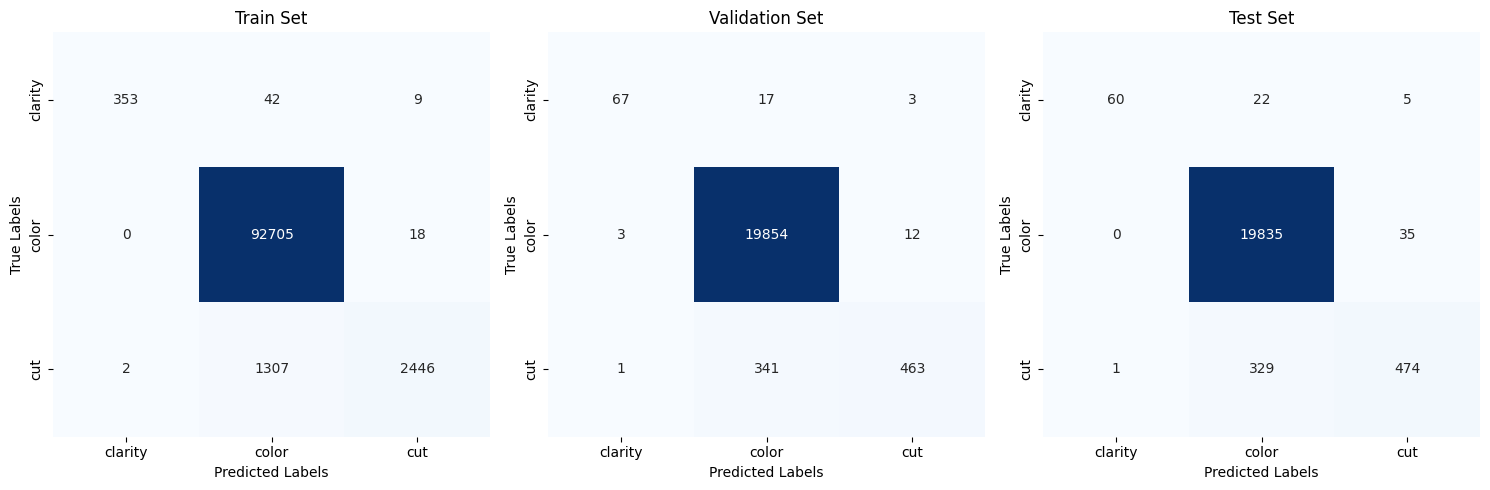

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Helper function to plot a single confusion matrix
def plot_single_confusion_matrix(ax, cm, title, labels):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax, cbar=False)
    ax.set_title(title)
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")

# Plot all confusion matrices side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns, adjust figure size as needed

# Assuming unique class labels are consistent across datasets
class_labels = np.unique(y_train)  # Update if needed

# Plot each confusion matrix
plot_single_confusion_matrix(axes[0], train_confusion_matrix, "Train Set", class_labels)
plot_single_confusion_matrix(axes[1], val_confusion_matrix, "Validation Set", class_labels)
plot_single_confusion_matrix(axes[2], test_confusion_matrix, "Test Set", class_labels)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
